sklearn.tree.DecisionTreeClassifier

sklearn.tree.ExtraTreeClassifier

sklearn.ensemble.ExtraTreesClassifier

sklearn.neighbors.KNeighborsClassifier

sklearn.neural_network.MLPClassifier

sklearn.neighbors.RadiusNeighborsClassifier

sklearn.ensemble.RandomForestClassifier

sklearn.linear_model.RidgeClassifierCV

In [1]:
import re    
import nltk  
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [2]:
train = pd.read_csv('dataset/train.csv')
test  = pd.read_csv('dataset/test.csv')

In [14]:
train.shape , test.shape

((3235, 6), (1387, 5))

In [4]:
train.columns

Index(['id', 'original_text', 'lang', 'retweet_count', 'original_author',
       'sentiment_class'],
      dtype='object')

In [5]:
train.dtypes

id                 float64
original_text       object
lang                object
retweet_count       object
original_author     object
sentiment_class      int64
dtype: object

In [6]:
train.head(5)

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...,en,1,FestiveFeeling,0
2,1.246087e+18,"Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin ...",en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv,en,0,Queenuchee,0
4,1.244876e+18,"Remembering the 3 most amazing ladies who made me who I am! My late grandmother iris, mum carol and great grandmother Ethel. Missed but never forgotten! Happy mothers day to all those great mums o...",en,0,brittan17446794,-1


In [7]:
train[train['sentiment_class'] == 0].head(5)

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...,en,1,FestiveFeeling,0
3,1.244803e+18,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv,en,0,Queenuchee,0
5,1.244524e+18,HAPPY MOTHER’S DAY! BRATZ WORLD FAMILIEZ YASMIN & HER MUM! (PORTIA) #bratz #bratzworldfamiliez #bratz2008 #bratzkidz #bratzyasmin #bratzportia #theonlygirlswithapassionforfashion #bratzdolls #brat...,en,0,chotia_mudit,0
9,1.245780e+18,"To all the mothers around the World, Gas To Health Initiative wishes them a Happy Mother's Day! - #gthi #mothersday2020 #MotheringSunday #MothersDay #lpg #motherhood #motherslove #gastohealth #arg...",en,0,LiveGoodProduct,0


In [8]:
train["sentiment_class"].value_counts()

 0    1701
-1     769
 1     765
Name: sentiment_class, dtype: int64

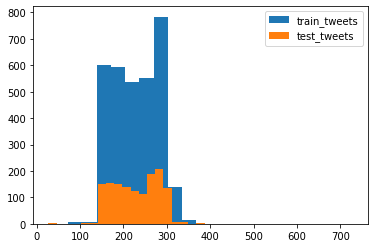

In [9]:
length_train = train['original_text'].str.len() 
length_test = test['original_text'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

combine both the train and test data

In [10]:
combi = train.append(test, ignore_index=True) 
combi.shape

C:\Users\DELL\Miniconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(4622, 6)

In [11]:
combi.drop(['id','original_author','lang','retweet_count'],axis=1,inplace=True)
combi.shape

(4622, 2)

now removing different punctuations , stop words , twitter tags

In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [13]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['original_text'], "@[\w]*") 
combi.head(10)

,original_text,sentiment_class,tidy_tweet
0,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...,0.0,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...
1,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...,0.0,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...
2,"Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin ...",-1.0,"Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin ..."
3,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv,0.0,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv
4,"Remembering the 3 most amazing ladies who made me who I am! My late grandmother iris, mum carol and great grandmother Ethel. Missed but never forgotten! Happy mothers day to all those great mums o...",-1.0,"Remembering the 3 most amazing ladies who made me who I am! My late grandmother iris, mum carol and great grandmother Ethel. Missed but never forgotten! Happy mothers day to all those great mums o..."
5,HAPPY MOTHER’S DAY! BRATZ WORLD FAMILIEZ YASMIN & HER MUM! (PORTIA) #bratz #bratzworldfamiliez #bratz2008 #bratzkidz #bratzyasmin #bratzportia #theonlygirlswithapassionforfashion #bratzdolls #brat...,0.0,HAPPY MOTHER’S DAY! BRATZ WORLD FAMILIEZ YASMIN & HER MUM! (PORTIA) #bratz #bratzworldfamiliez #bratz2008 #bratzkidz #bratzyasmin #bratzportia #theonlygirlswithapassionforfashion #bratzdolls #brat...
6,Happy Mother’s Day to all you wonderful mums out there! #mothersday #cupcakes #supermums #traceyscakecraft #couturesugarpaste #saracinouk #hinckley @Tracey's CakeCraft https://www. instagram.com/p...,1.0,Happy Mother’s Day to all you wonderful mums out there! #mothersday #cupcakes #supermums #traceyscakecraft #couturesugarpaste #saracinouk #hinckley 's CakeCraft https://www. instagram.com/p/B-CUzH...
7,Show me a mother of two as sexy as Rosie Happy Mothers Day beautiful Rosie @officiallrosie I love you #HappyMothersDayRosie #HappyMothersDay2020 #WhyILoveRoksie #Roksie pic.twitter.com/6oMZGHcIVe,1.0,Show me a mother of two as sexy as Rosie Happy Mothers Day beautiful Rosie I love you #HappyMothersDayRosie #HappyMothersDay2020 #WhyILoveRoksie #Roksie pic.twitter.com/6oMZGHcIVe
8,"To all the mothers, grandmothers, aunts, sisters and women in our lives who care for and love us unconditionally, Happy Mothers’ Day ! #MothersDay pic.twitter.com/ejatt1aH4z",1.0,"To all the mothers, grandmothers, aunts, sisters and women in our lives who care for and love us unconditionally, Happy Mothers’ Day ! #MothersDay pic.twitter.com/ejatt1aH4z"
9,"To all the mothers around the World, Gas To Health Initiative wishes them a Happy Mother's Day! - #gthi #mothersday2020 #MotheringSunday #MothersDay #lpg #motherhood #motherslove #gastohealth #arg...",0.0,"To all the mothers around the World, Gas To Health Initiative wishes them a Happy Mother's Day! - #gthi #mothersday2020 #MotheringSunday #MothersDay #lpg #motherhood #motherslove #gastohealth #arg..."


In [15]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(5)

,original_text,sentiment_class,tidy_tweet
0,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...,0.0,Happy #MothersDay to all you amazing mothers out there I know it s hard not being able to see your mothers today but it s on all of us to do what we can to protect the most vulnerable members of ...
1,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...,0.0,Happy Mothers Day Mum I m sorry I can t be there to bring you Mothers day flowers a cwtch honestly at this point I d walk on hot coals to be able to But I ll be there with bells on as soon ...
2,"Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin ...",-1.0,Happy mothers day To all This doing a mothers days work Today been quiet but Had time to reflect Dog walk finish a jigsaw do the garden learn few more guitar chords drunk some strawberry gin ...
3,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv,0.0,Happy mothers day to this beautiful woman royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic twitter com oeetI Pvv
4,"Remembering the 3 most amazing ladies who made me who I am! My late grandmother iris, mum carol and great grandmother Ethel. Missed but never forgotten! Happy mothers day to all those great mums o...",-1.0,Remembering the most amazing ladies who made me who I am My late grandmother iris mum carol and great grandmother Ethel Missed but never forgotten Happy mothers day to all those great mums o...


In [16]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
combi.head()

,original_text,sentiment_class,tidy_tweet
0,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...,0.0,Happy #MothersDay all you amazing mothers out there know hard not being able see your mothers today but all what can protect the most vulnerable members our society #BeatCoronaVirus pic twitter co...
1,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...,0.0,Happy Mothers Day Mum sorry can there bring you Mothers day flowers cwtch honestly this point walk hot coals able But there with bells soon can Love you lots xxx need more photos https photos app ...
2,"Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin ...",-1.0,Happy mothers day all This doing mothers days work Today been quiet but Had time reflect Dog walk finish jigsaw the garden learn few more guitar chords drunk some strawberry gin and tonic and watc...
3,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv,0.0,Happy mothers day this beautiful woman royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic twitter com oeetI Pvv
4,"Remembering the 3 most amazing ladies who made me who I am! My late grandmother iris, mum carol and great grandmother Ethel. Missed but never forgotten! Happy mothers day to all those great mums o...",-1.0,Remembering the most amazing ladies who made who late grandmother iris mum carol and great grandmother Ethel Missed but never forgotten Happy mothers day all those great mums out there Love sent a...


tokenization

In [17]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0    [Happy, #MothersDay, all, you, amazing, mothers, out, there, know, hard, not, being, able, see, your, mothers, today, but, all, what, can, protect, the, most, vulnerable, members, our, society, #B...
1    [Happy, Mothers, Day, Mum, sorry, can, there, bring, you, Mothers, day, flowers, cwtch, honestly, this, point, walk, hot, coals, able, But, there, with, bells, soon, can, Love, you, lots, xxx, nee...
2    [Happy, mothers, day, all, This, doing, mothers, days, work, Today, been, quiet, but, Had, time, reflect, Dog, walk, finish, jigsaw, the, garden, learn, few, more, guitar, chords, drunk, some, str...
3                               [Happy, mothers, day, this, beautiful, woman, royalty, soothes, you, mummy, jeremy, and, emerald, and, more, #PrayForRoksie, #UltimateLoveNG, pic, twitter, com, oeetI, Pvv]
4    [Remembering, the, most, amazing, ladies, who, made, who, late, grandmother, iris, mum, carol, and, great, grandmother, Ethel, Missed, but, never, forgotten, Happy, mothers, d

Lemmatization

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

In [19]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

In [20]:
combi.head(5)

,original_text,sentiment_class,tidy_tweet
0,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...,0.0,Happy #MothersDay all you amazing mother out there know hard not being able see your mother today but all what can protect the most vulnerable member our society #BeatCoronaVirus pic twitter com n...
1,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...,0.0,Happy Mothers Day Mum sorry can there bring you Mothers day flower cwtch honestly this point walk hot coal able But there with bell soon can Love you lot xxx need more photo http photo app goo vXB...
2,"Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin ...",-1.0,Happy mother day all This doing mother day work Today been quiet but Had time reflect Dog walk finish jigsaw the garden learn few more guitar chord drunk some strawberry gin and tonic and watch Le...
3,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv,0.0,Happy mother day this beautiful woman royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic twitter com oeetI Pvv
4,"Remembering the 3 most amazing ladies who made me who I am! My late grandmother iris, mum carol and great grandmother Ethel. Missed but never forgotten! Happy mothers day to all those great mums o...",-1.0,Remembering the most amazing lady who made who late grandmother iris mum carol and great grandmother Ethel Missed but never forgotten Happy mother day all those great mum out there Love sent all x...


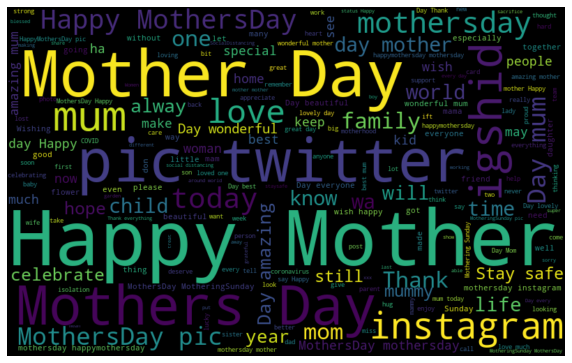

In [21]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

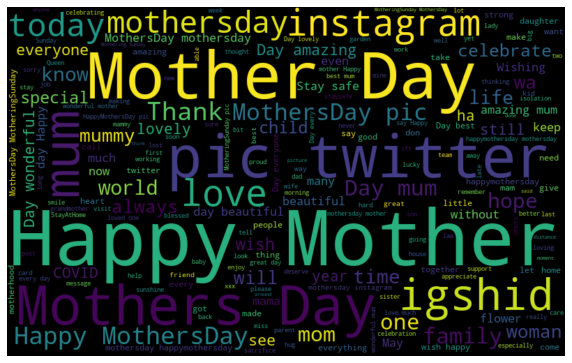

In [31]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment_class'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

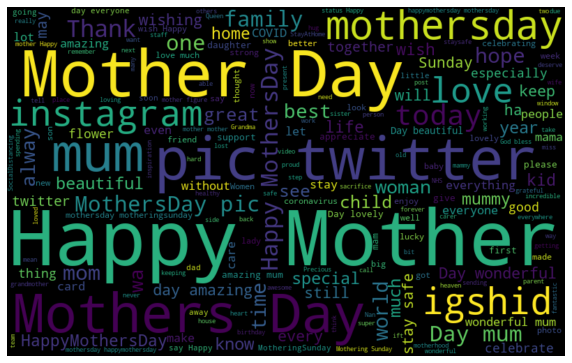

In [32]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment_class'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

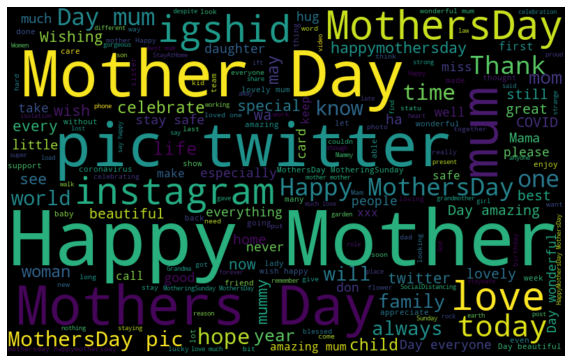

In [33]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment_class'] == -1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

extraction of the hashtags

In [22]:
def hashtag_extract(x):    
    hashtags = []    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [23]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['sentiment_class'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['sentiment_class'] == 1])

HT_nuetral = hashtag_extract(combi['tidy_tweet'][combi['sentiment_class'] == -1]) 

# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])
HT_nuetral = sum(HT_nuetral,[])

In [24]:
len(HT_negative),len(HT_nuetral),len(HT_regular)

(1740, 1737, 4054)

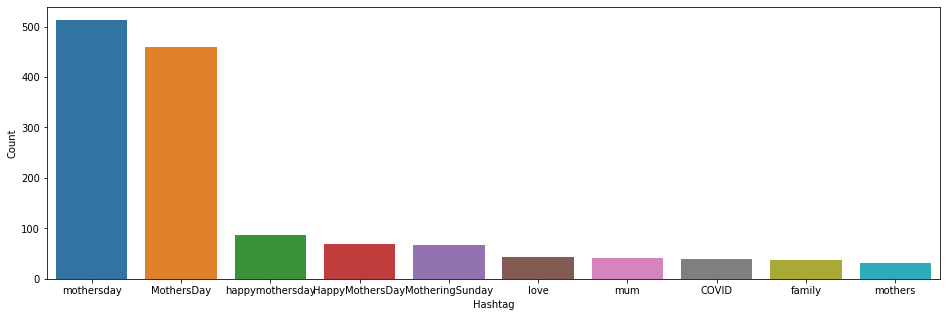

In [25]:
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

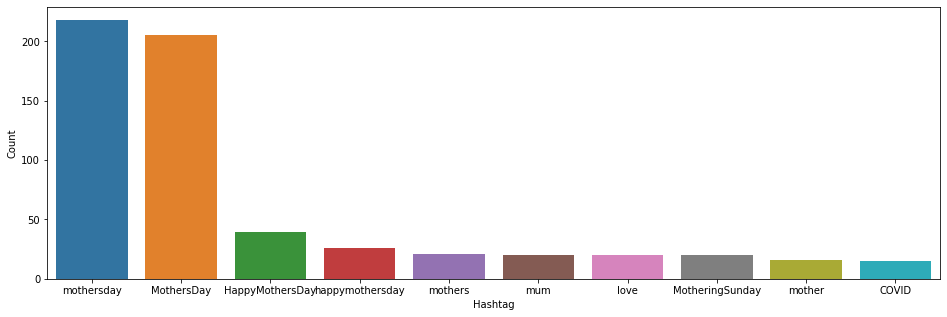

In [26]:
a = nltk.FreqDist(HT_negative) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [28]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=2000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combi['tidy_tweet']) 
bow.shape

(4622, 2000)

In [29]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=2000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet']) 
tfidf.shape

(4622, 2000)

In [30]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=300, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=40)

(3338041, 5622920)

In [31]:
model_w2v.wv.most_similar(positive="mother")

[('day', 0.5984331369400024),
 ('mothersand', 0.5118920803070068),
 ('outhere', 0.4917508065700531),
 ('Roman', 0.4898066520690918),
 ('gracious', 0.48822498321533203),
 ('gay', 0.48568809032440186),
 ('lesbian', 0.48011699318885803),
 ('happy', 0.46476083993911743),
 ('stepmother', 0.4626035690307617),
 ('belta', 0.4615901708602905)]

In [32]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue   # handling the case where the token is not in vocabulary 
    if(count != 0):
        vec /= count
    return vec

In [33]:
%%time
wordvec_arrays = np.zeros((len(tokenized_tweet), 300)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 300)
    wordvec_df = pd.DataFrame(wordvec_arrays) 
print(wordvec_df.shape)

(4622, 300)
Wall time: 2.76 s


In [34]:
wordvec_df.columns

RangeIndex(start=0, stop=300, step=1)

In [35]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [36]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [37]:
%%time 
labeled_tweets = add_label(tokenized_tweet)

Wall time: 37.9 ms


In [38]:
labeled_tweets[:6]

[LabeledSentence(words=['Happy', '#MothersDay', 'all', 'you', 'amazing', 'mother', 'out', 'there', 'know', 'hard', 'not', 'being', 'able', 'see', 'your', 'mother', 'today', 'but', 'all', 'what', 'can', 'protect', 'the', 'most', 'vulnerable', 'member', 'our', 'society', '#BeatCoronaVirus', 'pic', 'twitter', 'com', 'nFjFQ'], tags=['tweet_0']),
 LabeledSentence(words=['Happy', 'Mothers', 'Day', 'Mum', 'sorry', 'can', 'there', 'bring', 'you', 'Mothers', 'day', 'flower', 'cwtch', 'honestly', 'this', 'point', 'walk', 'hot', 'coal', 'able', 'But', 'there', 'with', 'bell', 'soon', 'can', 'Love', 'you', 'lot', 'xxx', 'need', 'more', 'photo', 'http', 'photo', 'app', 'goo', 'vXBLrsCzD'], tags=['tweet_1']),
 LabeledSentence(words=['Happy', 'mother', 'day', 'all', 'This', 'doing', 'mother', 'day', 'work', 'Today', 'been', 'quiet', 'but', 'Had', 'time', 'reflect', 'Dog', 'walk', 'finish', 'jigsaw', 'the', 'garden', 'learn', 'few', 'more', 'guitar', 'chord', 'drunk', 'some', 'strawberry', 'gin', 'and

In [39]:
%%time
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   
dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
size=300, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 
min_count=5, # Ignores all words with total frequency lower than 2.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23) 
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=30)

C:\Users\DELL\Miniconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████████████████████████████████████████████████████████████████████| 4622/4622 [00:00<00:00, 772199.68it/s]


Wall time: 13.2 s


In [40]:
docvec_arrays = np.zeros((len(tokenized_tweet), 300)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,300))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(4622, 300)

In [43]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
train_bow = bow[:3235,:] 
test_bow = bow[3235:,:]

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment_class'],random_state=42,test_size=0.2)

In [44]:
%%time
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()
rf = RandomForestClassifier(n_estimators=600, random_state=42,verbose=1).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   14.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished


Wall time: 15.2 s


In [45]:
f1_score(yvalid, prediction,average='weighted')

0.3707987082440792

In [46]:
test_pred = rf.predict(test_bow) 
test['sentiment_class'] = test_pred 
submission = test[['id','sentiment_class']] 
submission.to_csv('sub_rf_bow_nestimator=500.csv', index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.5s finished


In [47]:
%%time
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()
rfi = RandomForestClassifier(n_estimators=900, random_state=12,verbose=1).fit(xtrain_bow, ytrain) 
predictio = rfi.predict(xvalid_bow)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   31.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.6s finished


Wall time: 32.9 s


In [48]:
print(f1_score(yvalid, predictio,average='weighted'))

test_pred = rfi.predict(test_bow) 
test['sentiment_class'] = test_pred 
submission = test[['id','sentiment_class']] 
submission.to_csv('sub_rf_bow_nestimator=900.csv', index=False)



0.38200221247616883


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    1.3s finished


# XGB Classifier

In [50]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=16, n_estimators=1000).fit(xtrain_bow, ytrain) 
xgb_pred = xgb_model.predict(xvalid_bow) 
print(f1_score(yvalid,xgb_pred,average='weighted'))

0.4100999825806712


In [51]:
test_pred = xgb_model.predict(test_bow) 
test['sentiment_class'] = test_pred 
submission = test[['id','sentiment_class']] 
submission.to_csv('sub_xgb_bow_nestimator=1000.csv', index=False)

using tfidf and randomforest

In [52]:
%%time 
train_tfidf = tfidf[:3235,:] 
test_tfidf = tfidf[3235:,:]
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_tfidf, train['sentiment_class'],random_state=42,test_size=0.2)

rf = RandomForestClassifier(n_estimators=600, random_state=42).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow)
print(f1_score(yvalid, prediction,average='weighted'))

0.3628800717325782
Wall time: 22 s


In [53]:
test_pred = rf.predict(test_tfidf) 
test['sentiment_class'] = test_pred 
submission = test[['id','sentiment_class']] 
submission.to_csv('sub_rf_tfidf.csv', index=False)

using word2vec and random forest

In [87]:
train_bow = wordvec_df.iloc[:3235,:] 
test_bow = wordvec_df.iloc[3235:,:]

In [88]:
%%time 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment_class'],random_state=42,test_size=0.2)
rf = RandomForestClassifier(n_estimators=400, random_state=11,verbose=1).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   24.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


Wall time: 25.2 s


In [89]:
f1_score(yvalid, prediction,average='micro')

0.49768160741885625

In [90]:
test_pred = rf.predict(test_bow) 
test['sentiment_class'] = test_pred 
submission = test[['id','sentiment_class']] 
submission.to_csv('sub_rf_wordvecdf.csv', index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


using doc2vec and random forest

In [91]:
train_bow = docvec_df.iloc[:3235,:] 
test_bow = docvec_df.iloc[3235:,:]

In [92]:
%%time 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment_class'],random_state=42,test_size=0.2)
rf = RandomForestClassifier(n_estimators=400, random_state=11,verbose=1).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


Wall time: 23.9 s


In [93]:
f1_score(yvalid, prediction,average='micro')

0.5038639876352395

In [94]:
test_pred = rf.predict(test_bow) 
test['sentiment_class'] = test_pred 
submission = test[['id','sentiment_class']] 
submission.to_csv('sub_rf_doc2vec.csv', index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished
